In [15]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pm4py

# Parameters
num_instances = 500
start_time = datetime(2024, 7, 3, 8, 0)
workers = {
    "Worker 1": 20,
    "Worker 2": 30,
    "Worker 3": 25
}
durations = {
    "Container registration in the system": timedelta(minutes=5),
    "Move the container to Storage Area": timedelta(minutes=30),
    "Move the container to Control Area": timedelta(minutes=30),
    "Quality Check": timedelta(minutes=5),
    "Resolve Quality Problems": timedelta(hours=1),
    "Move the container to Shipping Area": timedelta(minutes=30),
    "Move the container to Ship": timedelta(minutes=30)
}

# Initialize DataFrame
columns = ["case:concept:name", "concept:name", "time:timestamp", "org:resource", "cost"]
data = []

for instance_id in range(1, num_instances + 1):
    current_time = start_time + timedelta(hours=(instance_id - 1))
    
    # Container registration
    activity = "Container registration in the system"
    worker = "Worker 1"
    start = current_time
    end = start + durations[activity]
    cost = (durations[activity].total_seconds() / 3600) * workers[worker]
    data.append([instance_id, activity, start, worker, cost])
    current_time = end
    
    # Move to Storage Area
    activity = "Move the container to Storage Area"
    worker = "Worker 2"
    start = current_time
    end = start + durations[activity]
    cost = (durations[activity].total_seconds() / 3600) * workers[worker]
    data.append([instance_id, activity, start, worker, cost])
    current_time = end
    
    # Move to Control Area
    activity = "Move the container to Control Area"
    worker = "Worker 3"
    start = current_time
    end = start + durations[activity]
    cost = (durations[activity].total_seconds() / 3600) * workers[worker]
    data.append([instance_id, activity, start, worker, cost])
    current_time = end
    
    # Quality Check
    activity = "Quality Check"
    worker = "Worker 1"
    start = current_time
    end = start + durations[activity]
    cost = (durations[activity].total_seconds() / 3600) * workers[worker]
    data.append([instance_id, activity, start, worker, cost])
    current_time = end
    
    # Conditional Quality Problems
    if np.random.rand() < 0.1:  # 10% chance of quality problems
        activity = "Resolve Quality Problems"
        worker = "Worker 3"
        start = current_time
        end = start + durations[activity]
        cost = (durations[activity].total_seconds() / 3600) * workers[worker]
        data.append([instance_id, activity, start, worker, cost])
        current_time = end
    
    # Move to Storage Area
    activity = "Move the container to Storage Area"
    worker = "Worker 2"
    start = current_time
    end = start + durations[activity]
    cost = (durations[activity].total_seconds() / 3600) * workers[worker]
    data.append([instance_id, activity, start, worker, cost])
    current_time = end
    
    # Move to Shipping Area
    activity = "Move the container to Shipping Area"
    worker = "Worker 3"
    start = current_time
    end = start + durations[activity]
    cost = (durations[activity].total_seconds() / 3600) * workers[worker]
    data.append([instance_id, activity, start, worker, cost])
    current_time = end
    
    # Move to Ship
    activity = "Move the container to Ship"
    worker = "Worker 2"
    start = current_time
    end = start + durations[activity]
    cost = (durations[activity].total_seconds() / 3600) * workers[worker]
    data.append([instance_id, activity, start, worker, cost])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Convert DataFrame to event log
log = pm4py.format_dataframe(df, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')

# Export event log to XES file
pm4py.write_xes(log, "SmartHarbor_process_log.xes")

exporting log, completed traces ::   0%|          | 0/500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/500 [00:00<?, ?it/s]

Basic Statistics
       case:concept:name                        concept:name  \
count               3548                                3548   
unique               500                                   7   
top                  444  Move the container to Storage Area   
freq                   8                                1000   
mean                 NaN                                 NaN   
min                  NaN                                 NaN   
25%                  NaN                                 NaN   
50%                  NaN                                 NaN   
75%                  NaN                                 NaN   
max                  NaN                                 NaN   
std                  NaN                                 NaN   

                             time:timestamp org:resource         cost  
count                                  3548         3548  3548.000000  
unique                                  NaN            3          NaN 

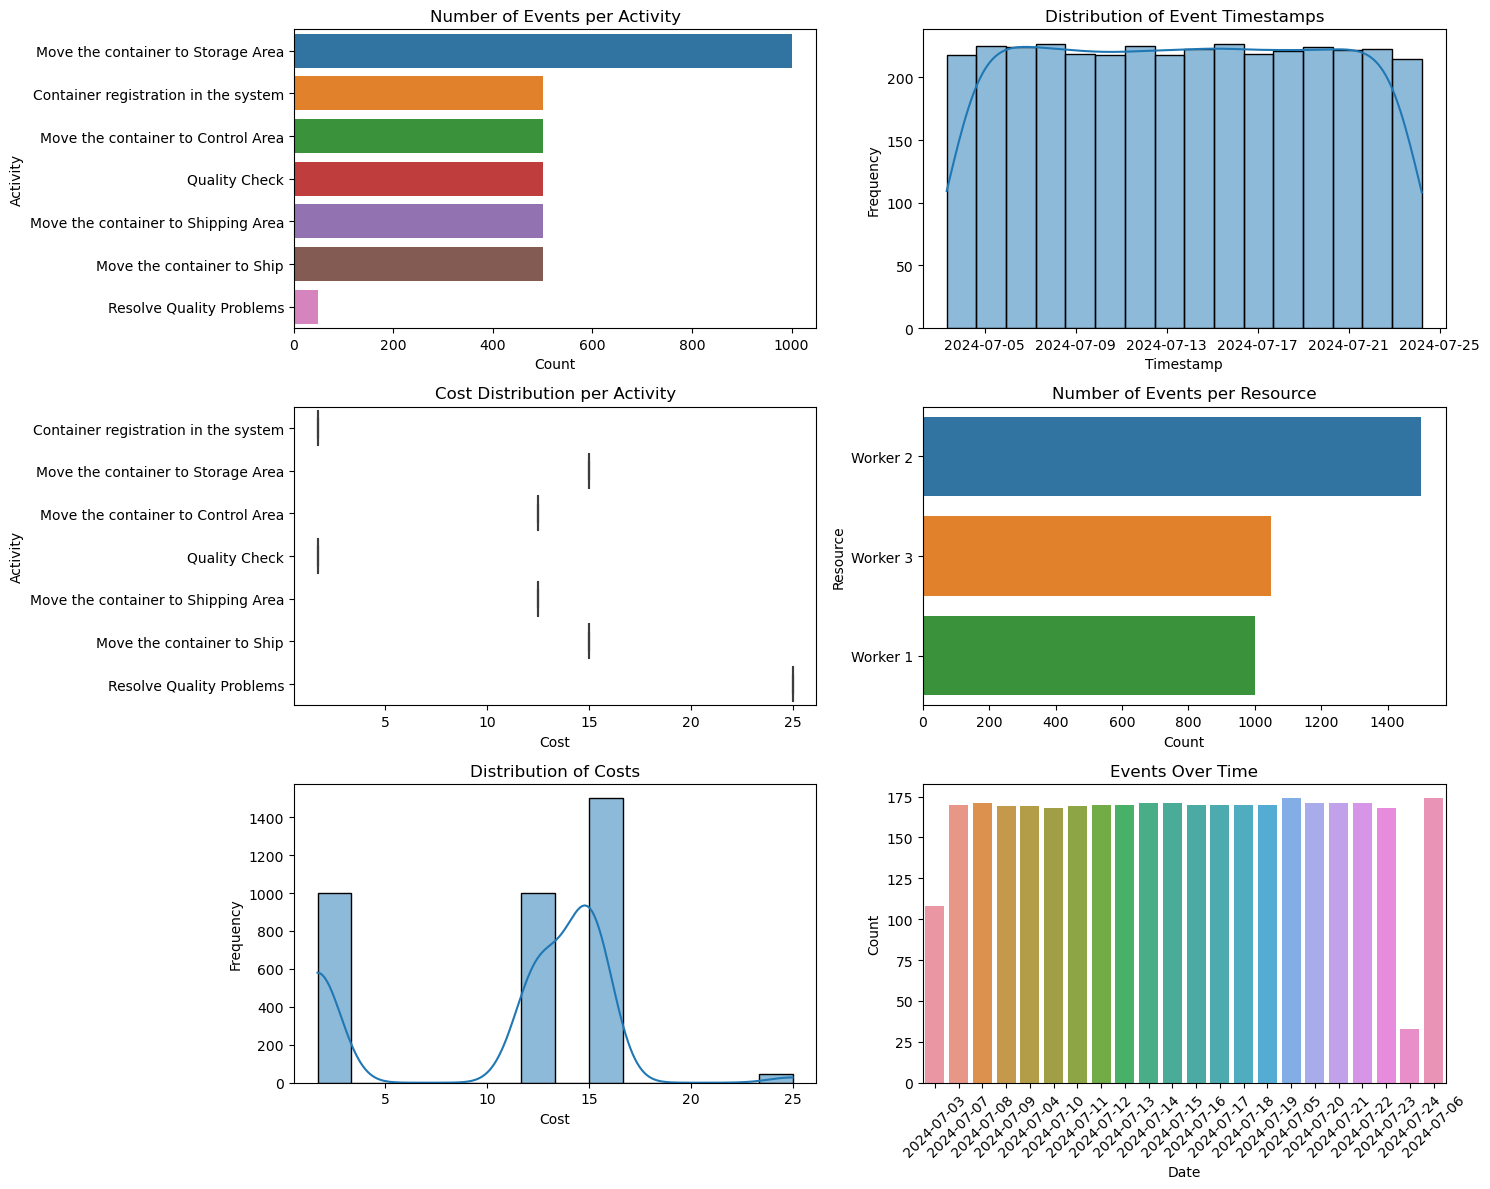

In [17]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the XES file
xes_file_path = "SmartHarbor_process_log.xes"

# Import the event log
log = xes_importer.apply(xes_file_path)

# Create a DataFrame from the event log
data = []
for trace in log:
    for event in trace:
        data.append({
            'case:concept:name': trace.attributes['concept:name'],
            'concept:name': event['concept:name'],
            'time:timestamp': event['time:timestamp'],
            'org:resource': event['org:resource'],
            'cost': event['cost']
        })

df = pd.DataFrame(data)

# Display basic statistics with datetime treated as numeric
print("Basic Statistics")
print(df.describe(include='all', datetime_is_numeric=True))

# Plot settings
plt.figure(figsize=(15, 12))

# Plot the number of events per activity
plt.subplot(3, 2, 1)
sns.countplot(y='concept:name', data=df, order=df['concept:name'].value_counts().index)
plt.title('Number of Events per Activity')
plt.xlabel('Count')
plt.ylabel('Activity')

# Plot the distribution of event timestamps
plt.subplot(3, 2, 2)
sns.histplot(df['time:timestamp'], kde=True)
plt.title('Distribution of Event Timestamps')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')

# Plot the cost distribution per activity
plt.subplot(3, 2, 3)
sns.boxplot(x='cost', y='concept:name', data=df)
plt.title('Cost Distribution per Activity')
plt.xlabel('Cost')
plt.ylabel('Activity')

# Plot the number of events per resource
plt.subplot(3, 2, 4)
sns.countplot(y='org:resource', data=df, order=df['org:resource'].value_counts().index)
plt.title('Number of Events per Resource')
plt.xlabel('Count')
plt.ylabel('Resource')

# Plot the distribution of costs
plt.subplot(3, 2, 5)
sns.histplot(df['cost'], kde=True)
plt.title('Distribution of Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')

# Plot the events over time for each case
plt.subplot(3, 2, 6)
df['date'] = df['time:timestamp'].dt.date
sns.countplot(x='date', data=df)
plt.title('Events Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()